# Elliptic Curve Arithmetic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings

# Disable the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
def calculate_merged_df(nlimbs):
    """
    Calculates a dataframe of the following format for a given value of NLIMBS:

    | NLIMBS | Function | CT | SCT | Performance Overhead (%) |
    |--------|----------|----|-----|--------------------------|
    | ...    | ...      | ...| ... | ...                      |
    
    Parameters:
    - nlimbs (int): The value of NLIMBS for which to calculate the dataframe.
    
    Returns:
    - df (pandas.DataFrame): The resulting dataframe containing NLIMBS, Function, CT, SCT,
                             and Performance Overhead (%) columns.
    """
    
    df_sct = pd.read_csv(f'../data/sct/ecc/{nlimbs}/merged.csv')
    # Remove the ".csv" suffix from the 'Function' column
    df_sct['Function'] = df_sct['Function'].str.replace('.csv', '')
    
    df_ct = pd.read_csv(f'../data/ct/ecc/{nlimbs}/merged.csv')
    # Remove the ".csv" suffix from the 'Function' column
    df_ct['Function'] = df_ct['Function'].str.replace('.csv', '')
    
    # Merge the dataframes on the 'Function' column
    merged_df = df_sct.merge(df_ct, on='Function')
    
    # Calculate the performance overhead as a percentage
    merged_df['Performance Overhead (%)'] = ((merged_df['SCT'] - merged_df['CT']) / merged_df['CT']) * 100
    
    # Round the performance overhead to two decimal places
    merged_df['Performance Overhead (%)'] = merged_df['Performance Overhead (%)'].round(2)
    
    # Add an 'NLIMBS' column
    merged_df = merged_df.assign(NLIMBS=nlimbs)
    
    # Reorder the columns
    merged_df = merged_df[['NLIMBS', 'Function', 'CT', 'SCT', 'Performance Overhead (%)']]
    
    return merged_df

In [4]:
def plot_merged_df(df):
    """
    Plots the CT and SCT bars for each Function in the provided dataframe.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing the NLIMBS, Function, CT, SCT
                             and Performance Overhead (%) columns.

    Returns:
    None
    """
        
    nlimbs = df['NLIMBS'][0]
    
    # Set the figure size
    plt.figure(figsize=(10, 6))

    # Set the width of each bar
    bar_width = 0.35

    # Generate the index for the x-axis ticks
    x_ticks = np.arange(len(df))
    
    # Create a bar plot for CT
    plt.bar(x_ticks, df['CT'], width=bar_width, label='CT')

    # Create a bar plot for SCT
    plt.bar(x_ticks + bar_width, df['SCT'], width=bar_width, label='SCT')

    # Set the x-axis ticks and labels
    plt.xticks(x_ticks + bar_width/2, df['Function'])

    # Set the labels and title
    plt.xlabel('Function')
    plt.ylabel('Clock Cyles')
    plt.title(f'CT & SCT comparison for {nlimbs} Limbs')
    plt.legend()

    # Show the plot
    plt.show()

In [5]:
def get_function_df(df_list, function):
    """
    Computes a dataframe with NLIMBS, CT and SCT for a given Function from a list of dataframes.

    Parameters:
    - df_list (list): A list of pandas dataframes containing the required data.
    - function (str): The Function value to filter the dataframes.

    Returns:
    - merged_df (pandas.DataFrame): The resulting dataframe containing NLIMBS, Function, CT and SCT columns.
    """
    
    merged_df = pd.DataFrame()
    for df in df_list:
        filtered_df = df[df['Function'].str.startswith(function)]
        merged_df = merged_df.append(filtered_df, ignore_index=True)
        
        # Drop the 'Performance Overhead (%)' column
        merged_df = merged_df.drop('Performance Overhead (%)', axis=1)

        # Add a 'Delta' column
        # merged_df['Delta'] = merged_df['SCT'] - merged_df['CT']
    return merged_df

In [6]:
def plot_function_df(df, function):
    """
    Plots the performance comparison of CT and SCT for a specific Function from the provided dataframe.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing the performance data.
    - function (str): The Function value for which to plot the performance comparison.

    Returns:
    None
    """
    
    # Create a figure and axes objects
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax = df.plot(x='NLIMBS', y=['SCT', 'CT'], ax=ax)
    ax.set_ylabel('Clock Cyles')
    ax.set_title(f'{function} performance comparison')
    
    # Set the legend in the upper right corner
    ax.legend(loc='upper right')
    
    plt.show()

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,1,ecc_add,580,660,13.79
1,1,ecc_double,520,560,7.69
2,1,ecc_mixed_add,480,540,12.50
3,1,ecc_normalize,3060,2880,-5.88
4,1,ecc_scalar_mul,67760,70640,4.25


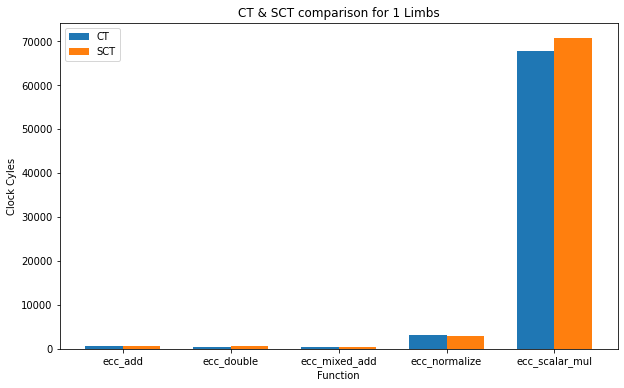

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,2,ecc_add,1080,1160,7.41
1,2,ecc_double,960,1020,6.25
2,2,ecc_mixed_add,920,980,6.52
3,2,ecc_normalize,12200,12500,2.46
4,2,ecc_scalar_mul,256060,260800,1.85


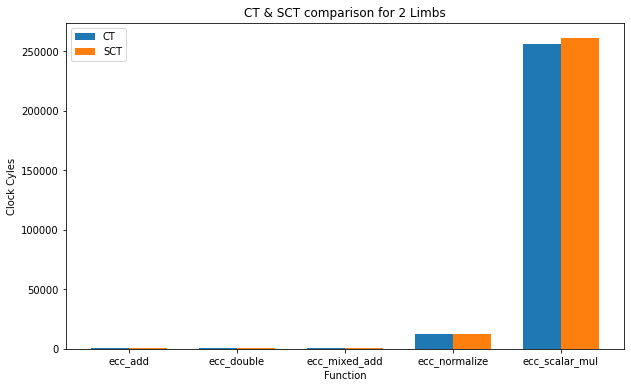

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,3,ecc_add,1720,1800,4.65
1,3,ecc_double,1500,1540,2.67
2,3,ecc_mixed_add,1480,1540,4.05
3,3,ecc_normalize,33260,33320,0.18
4,3,ecc_scalar_mul,611620,623520,1.95


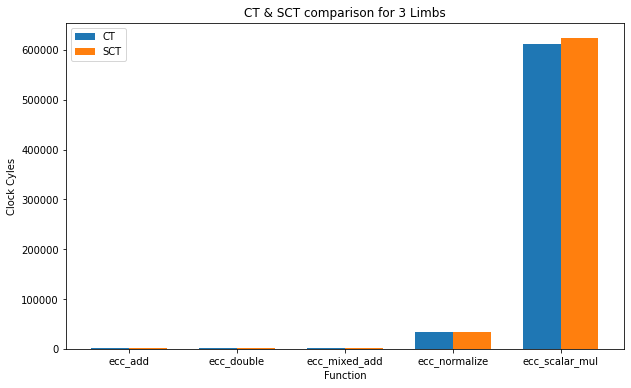

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,4,ecc_add,2480,2520,1.61
1,4,ecc_double,2180,2240,2.75
2,4,ecc_mixed_add,2160,2220,2.78
3,4,ecc_normalize,63760,63620,-0.22
4,4,ecc_scalar_mul,1178600,1186000,0.63


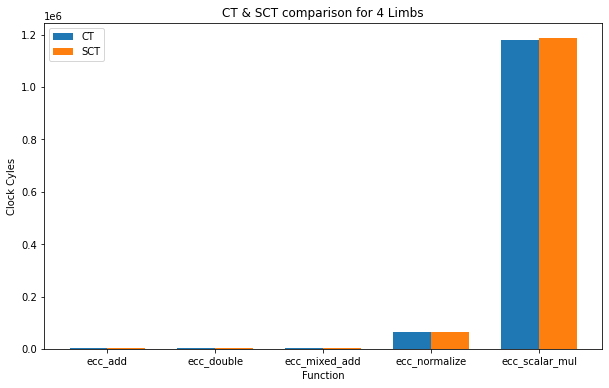

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,5,ecc_add,3280,3340,1.83
1,5,ecc_double,2920,2980,2.05
2,5,ecc_mixed_add,2920,2980,2.05
3,5,ecc_normalize,105600,104480,-1.06
4,5,ecc_scalar_mul,1970140,1985980,0.80


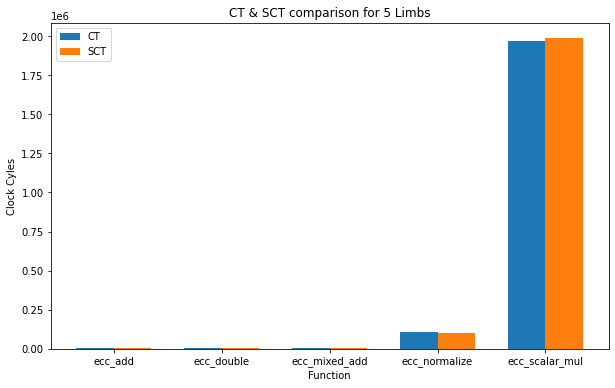

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,6,ecc_add,4160,4240,1.92
1,6,ecc_double,3740,3780,1.07
2,6,ecc_mixed_add,3700,3800,2.70
3,6,ecc_normalize,161800,166140,2.68
4,6,ecc_scalar_mul,3005100,3028120,0.77


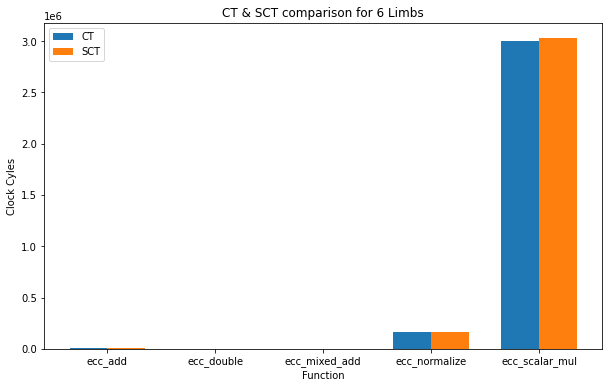

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,7,ecc_add,5220,5320,1.92
1,7,ecc_double,4700,4740,0.85
2,7,ecc_mixed_add,4680,4780,2.14
3,7,ecc_normalize,234340,242280,3.39
4,7,ecc_scalar_mul,4440840,4462100,0.48


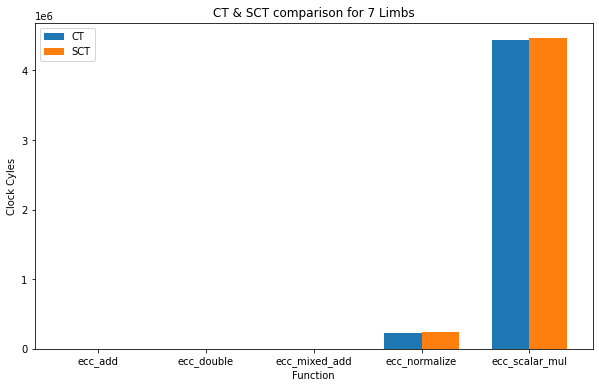

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,8,ecc_add,6460,6520,0.93
1,8,ecc_double,5740,5780,0.70
2,8,ecc_mixed_add,5760,5860,1.74
3,8,ecc_normalize,337000,350640,4.05
4,8,ecc_scalar_mul,6219380,6259060,0.64


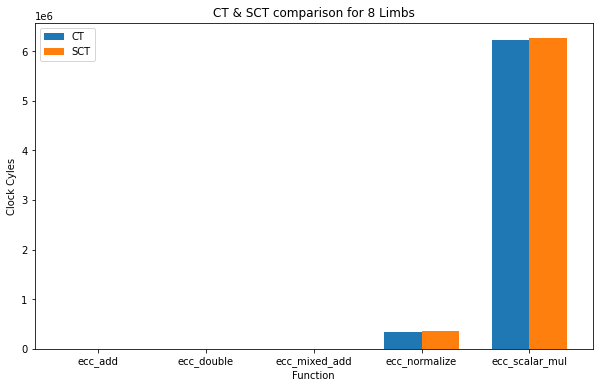

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,9,ecc_add,7680,7720,0.52
1,9,ecc_double,6860,6880,0.29
2,9,ecc_mixed_add,6880,6920,0.58
3,9,ecc_normalize,465660,483180,3.76
4,9,ecc_scalar_mul,8349220,8351120,0.02


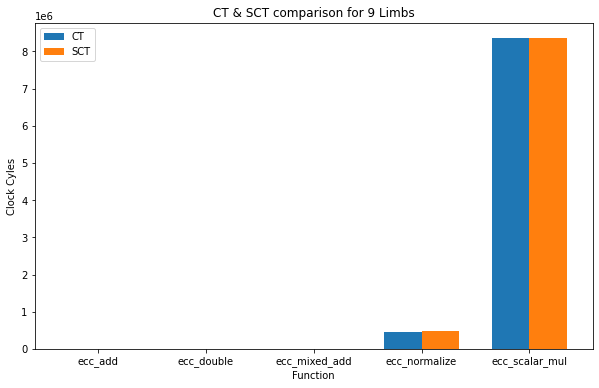

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,10,ecc_add,8980,9120,1.56
1,10,ecc_double,8060,8140,0.99
2,10,ecc_mixed_add,8160,8140,-0.25
3,10,ecc_normalize,604980,631100,4.32
4,10,ecc_scalar_mul,10899100,10977320,0.72


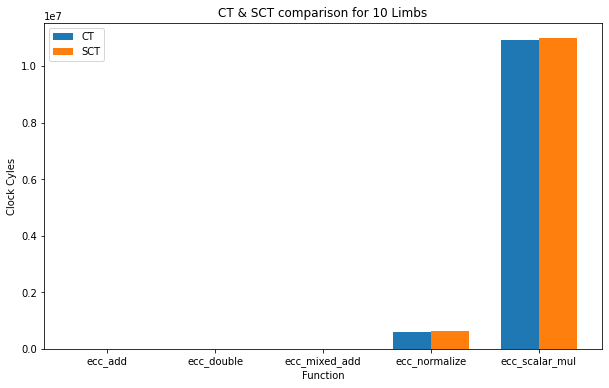

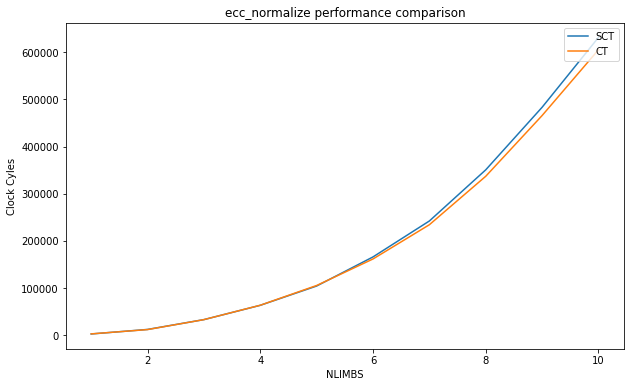

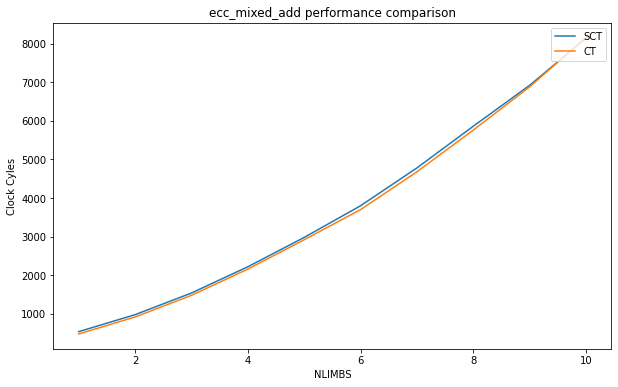

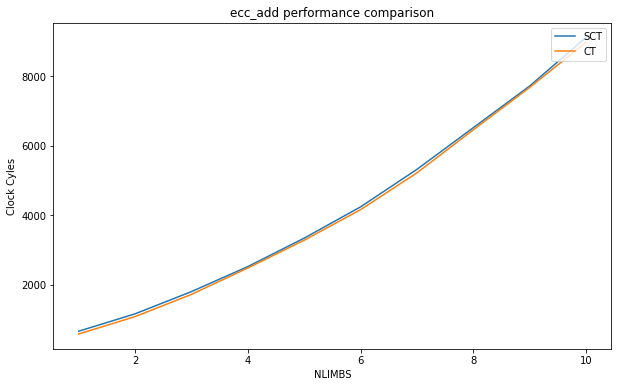

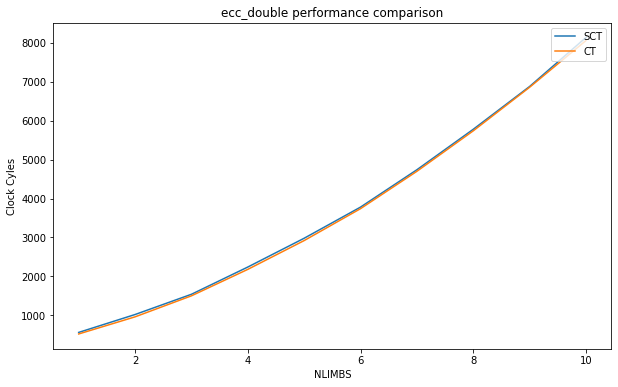

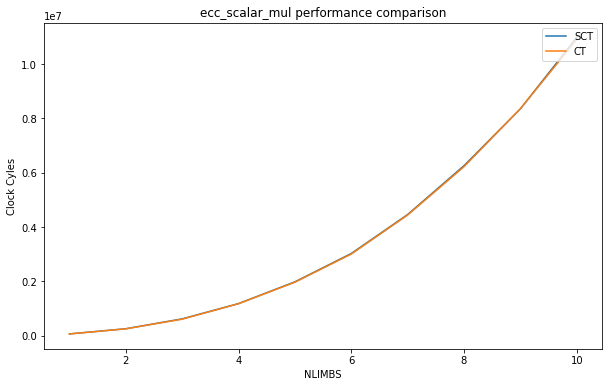

In [7]:
# Plot all data at once

MIN_LIMBS = 1
MAX_LIMBS = 10

merged_df_list = []
functions = ['ecc_normalize', 'ecc_mixed_add', 'ecc_add', 'ecc_double', 'ecc_scalar_mul']

for i in range(MIN_LIMBS, MAX_LIMBS + 1):
    df = calculate_merged_df(i)
    merged_df_list.append(df)
    display(df)
    plot_merged_df(df)
    
for f in functions:
    df = get_function_df(merged_df_list, f)
    plot_function_df(df, f)